<h2 style='color:green' align='center' ><font size="5.5">Classification of Anomalies  in Gastrointestinal Tract through Endoscopic Imagery  Using Convolutional Neural Network (CNN)</font></h2>


<h2 style='color:gray' ><font size="3">Loading the image set and splits using 70% of the data for training and the remaining 30% for testing</font></h2>


In [2]:
import os
import splitfolders 

input_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2')
output_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7, .3), group_prefix=None)

Copying files: 8000 files [10:17, 12.95 files/s]


In [6]:
train_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted\train')
test_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted\val')

<h2 style='color:gray' ><font size="3">ImageDataGenerator class which is used to perform image augmentation and flow_from_directory to read the images from a big numpy array and folders containing images.</font></h2>


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [8]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 7592 images belonging to 8 classes.
Found 4192 images belonging to 8 classes.


In [9]:
classes=['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']

<h2 style='color:gray' ><font size="3">Preparing traing and testing data sets as X_train,y_train,X_test ,y_test</font></h2>

In [10]:
import numpy as np

In [11]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)
        

In [12]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           


In [13]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [14]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

<h2 style='color:gray' ><font size="3">Converting the feature lists into a NumPy array.</font></h2>

In [15]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [16]:
X_train.shape

(7592, 75, 75, 3)

In [17]:
y_train.shape

(7592,)

<h2 style='color:gray' ><font size="3">Ploting sample images using matplotlib.pyplot</font></h2>

In [18]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

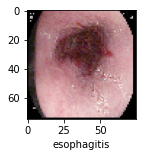

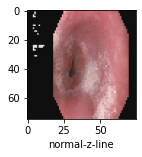

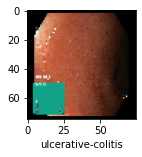

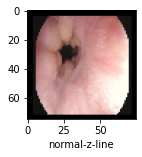

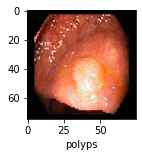

In [20]:
for i in range(5):    
    plot_sample(X_train, y_train, i)

<h2 style='color:gray' ><font size="3">Creating CNN usinga Sequential model by passing a list of layers to the Sequential constructor.</font></h2>

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

<h2 style='color:gray' ><font size="3">Show model summary</font></h2>

In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

<h2 style='color:gray' ><font size="3"> Complieing the CNN model using Optimizer and loss function before training.</font></h2>

In [24]:
cnn.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h2 style='color:gray' ><font size="3">Fitting the dataset to train</font></h2>

In [25]:
history=cnn.fit(X_train, y_train, epochs=16)

Epoch 1/16
238/238 [==============================] - 79s 322ms/step - loss: 1.2441 - accuracy: 0.4690
Epoch 2/16
238/238 [==============================] - 80s 338ms/step - loss: 0.7015 - accuracy: 0.6919
Epoch 3/16
238/238 [==============================] - 80s 335ms/step - loss: 0.6145 - accuracy: 0.7188
Epoch 4/16
238/238 [==============================] - 78s 327ms/step - loss: 0.5640 - accuracy: 0.7519
Epoch 5/16
238/238 [==============================] - 79s 333ms/step - loss: 0.5192 - accuracy: 0.7709
Epoch 6/16
238/238 [==============================] - 78s 328ms/step - loss: 0.4967 - accuracy: 0.7812
Epoch 7/16
238/238 [==============================] - 81s 338ms/step - loss: 0.4417 - accuracy: 0.8048
Epoch 8/16
238/238 [==============================] - 79s 334ms/step - loss: 0.4382 - accuracy: 0.8109
Epoch 9/16
238/238 [==============================] - 78s 327ms/step - loss: 0.3752 - accuracy: 0.8484
Epoch 10/16
238/238 [==============================] - 79s 332ms/step - l

<h2 style='color:gray' ><font size="3">Finding  model accuracy </font></h2>

In [36]:
accuracy=cnn.evaluate(X_test,y_test)[1]
print("\nModel Accuracy =", (accuracy * 100.0),"%") 

131/131 [==============================] - 11s 84ms/step - loss: 0.1971 - accuracy: 0.9330

Model Accuracy = 93.29675436019897 %


In [37]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760


<h2 style='color:gray' ><font size="3">Visualizeing loss history </font></h2>

In [38]:
(history.history).keys()

dict_keys(['loss', 'accuracy'])

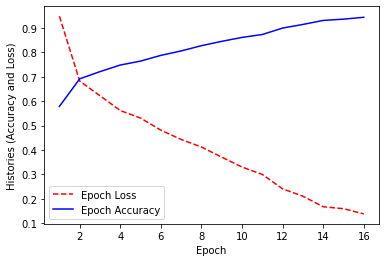

In [39]:
# Get accuracy and test loss histories
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['Epoch Loss', 'Epoch Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Histories (Accuracy and Loss)')
plt.show();

<h2 style='color:gray' ><font size="3">Checking model prediction</font></h2>

In [40]:
y_pred = cnn.predict(X_test)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]

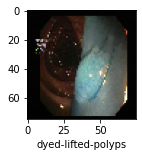

In [42]:
#Correct Anomalies 
plot_sample(X_test, y_test,4)

In [43]:
#Predict Anomalies by model
classes[y_classes[4]]

'dyed-lifted-polyps'

<h2 style='color:gray' ><font size="3">Computing confusion matrix to evaluate the accuracy of a classification.</font></h2>

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_classes)
cm

array([[466,  58,   0,   0,   0,   0,   0,   0],
       [  7, 516,   0,   0,   0,   0,   1,   0],
       [  0,   0, 495,   0,   0,  29,   0,   0],
       [  1,   0,   0, 513,   0,   0,  10,   0],
       [  0,   1,   8,   0, 504,  10,   0,   1],
       [  0,   0, 107,   0,   1, 416,   0,   0],
       [  5,   1,   0,   4,   0,   0, 502,  12],
       [  0,   0,   0,   3,   0,   0,  22, 499]], dtype=int64)

<h2 style='color:gray' ><font size="3">Visualizing model accuracy using seaborn heatmap</font></h2>

([<matplotlib.axis.YTick at 0x2c680ed7f48>,
 [Text(0, 0, 'dyed-lifted-polyps'),
  Text(0, 1, 'dyed-resection-margins'),
  Text(0, 2, 'esophagitis'),
  Text(0, 3, 'normal-cecum'),
  Text(0, 4, 'normal-pylorus'),
  Text(0, 5, 'normal-z-line'),
  Text(0, 6, 'polyps'),
  Text(0, 7, 'ulcerative-colitis')])

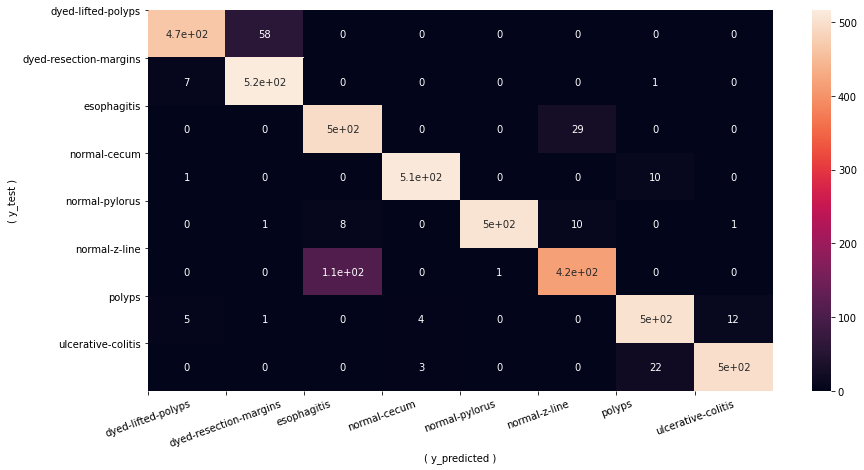

In [45]:
import seaborn as sn

plt.figure(figsize=(14,7))
sn.heatmap(cm,annot=True)

plt.ylabel('( y_test )')
plt.xlabel('( y_predicted )')
plt.xticks(range(len(classes)),classes, rotation=20)
plt.yticks(range(len(classes)),classes,rotation=0)
